In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


Importing necessary libraries and the Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Sampling

In [5]:
df_sampling = df.sample(10)
df_sampling.head()

,sepal_length,sepal_width,petal_length,petal_width,species
99,5.7,2.8,4.1,1.3,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
54,6.5,2.8,4.6,1.5,Iris-versicolor


Lerning the structute

In [6]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.shape

(150, 5)

In [9]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [10]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [14]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Change attribute names

In [16]:
act_cols = df.columns
act_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [17]:
new_cols = ['SL','SW','PL','PW','Flowers']
df.columns = new_cols
df.head(5)

,SL,SW,PL,PW,Flowers
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
type(df["SL"])

pandas.core.series.Series

In [19]:
type(df["SW"])

pandas.core.series.Series

In [20]:
type(df["PL"])

pandas.core.series.Series

In [21]:
type(df["PW"])

pandas.core.series.Series

In [22]:
df.sort_values('Flowers',ascending = False)[1:6]

,SL,SW,PL,PW,Flowers
111,6.4,2.7,5.3,1.9,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica


In [23]:
df.sort_index(ascending = False)[:6]

,SL,SW,PL,PW,Flowers
149,5.9,3.0,5.1,1.8,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


Part of dataset

In [24]:
df[135:140]

,SL,SW,PL,PW,Flowers
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica


In [25]:
# df.iocl[135:140][["SL","PL", PW"]]
df.iloc[135:140 , 1:4]

,SW,PL,PW
135,3.0,6.1,2.3
136,3.4,5.6,2.4
137,3.1,5.5,1.8
138,3.0,4.8,1.8
139,3.1,5.4,2.1


In [26]:
df.values[20:25]

array([[5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Iris-setosa']], dtype=object)

Task(s)
1. Create a DataFrame from iris bunch data type dataset available with sci-kit learn

In [27]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
iris_df['target'] = iris.target

In [28]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Visualizations

1.Pair Plot:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

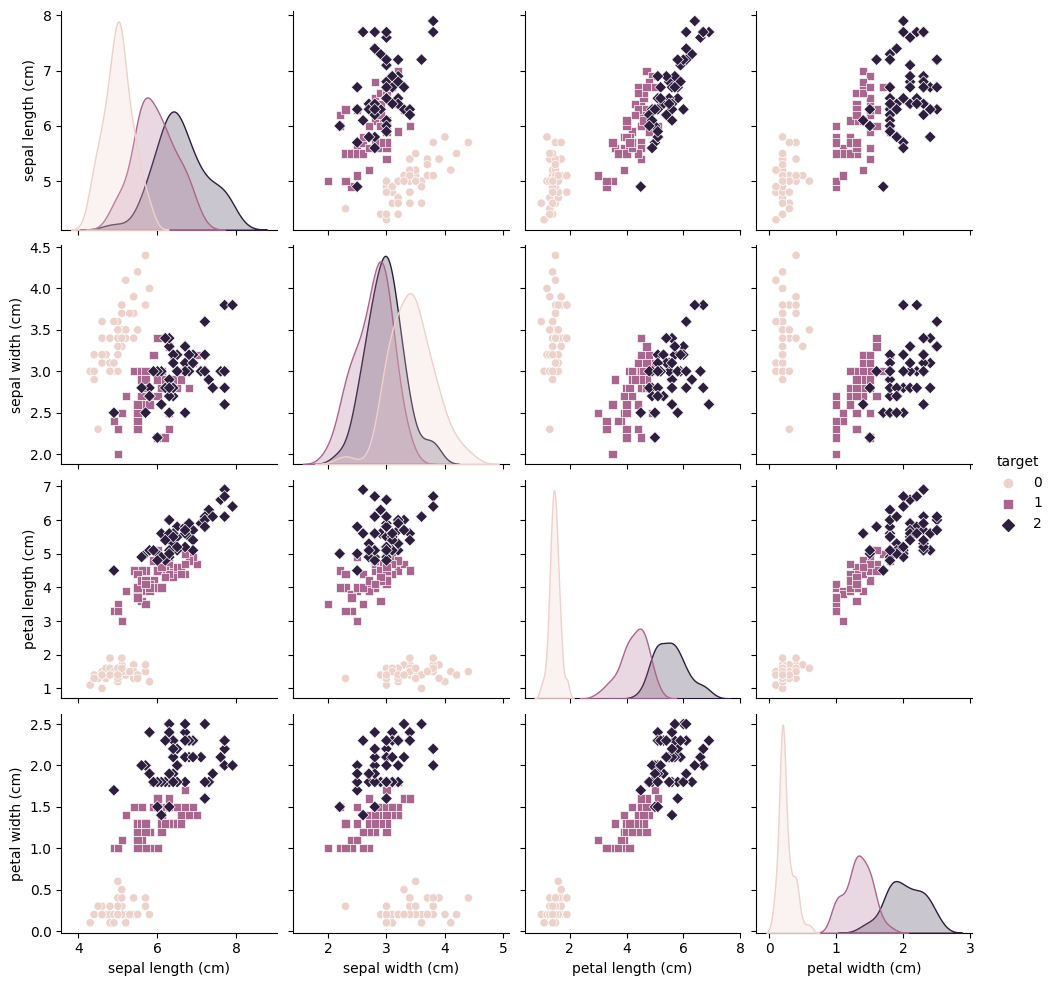

In [29]:
# Pair Plot
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])
plt.show()

2. Correlation Matrix and Heatmap:

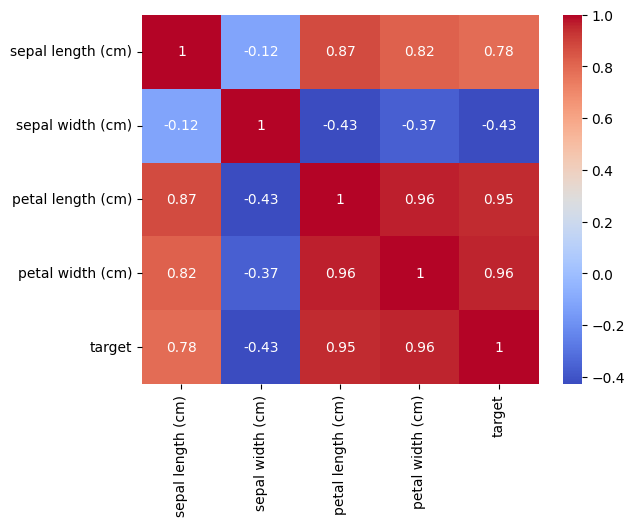

In [30]:
# Correlation Matrix
corr_matrix = iris_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# PCA ( Principal Component Analysis) for Dimensionality Reduction

In [31]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['target'] = iris.target

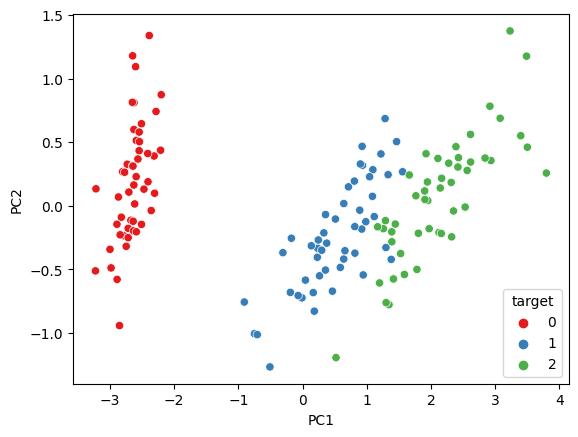

In [32]:
# Scatter Plot of PCA Result
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='Set1')
plt.show()

# Train-Test Split

In [33]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)


# Train SVM (Support Vector Machine) Model and Evaluate

In [34]:
# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

